# Social Network Analysis

In [29]:
# load json
import json
with open('starwars-full-interactions-allCharacters-merged.json', 'r') as reader:
    data = json.load(reader)
characters = data['nodes']
relations = data['links']
nodes = [character['name'] for character in characters]
edges = []
weighted_edges = []
no_edge_nodes = nodes.copy()
for relation in relations:
    source_name = nodes[relation['source']]
    target_name = nodes[relation['target']]
    weight = relation['value']
    edges.append((source_name, target_name))
    weighted_edges.append((source_name, target_name, weight))
    try:
        no_edge_nodes.remove(source_name)
        no_edge_nodes.remove(target_name)
    except ValueError:
        pass
for no_edge_node in no_edge_nodes:
    nodes.remove(no_edge_node)

In [30]:
# generate graph
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

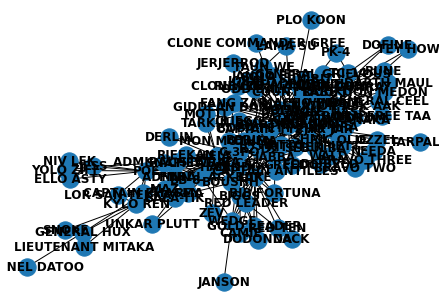

In [31]:
# visualize graph
from matplotlib import pyplot as plt
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight= 'bold')
edge_weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [32]:
# generate weighted graph
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(weighted_edges)
for character in characters:
    try:
        G.nodes[character['name']]['weight'] = character['value']
        G.nodes[character['name']]['color'] = character['colour']
    except KeyError:
        pass

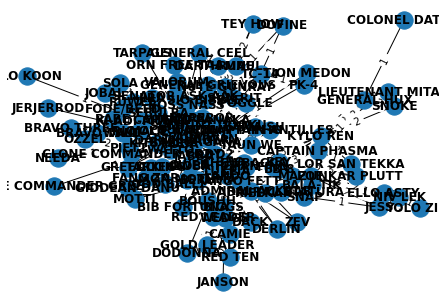

In [33]:
# visualize weighted graph
from matplotlib import pyplot as plt
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight= 'bold')
edge_weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [34]:

print("diamter")
print(nx.diameter(G))
print("---------------")
print("average shortest path length")
print(nx.average_shortest_path_length(G))
print("---------------")
print("density")
print(nx.density(G))

diamter
6
---------------
average shortest path length
2.6100083402835694
---------------
density
0.07406171809841534


In [35]:
degree = nx.degree(G)
deg_dict = dict(degree)
min_val = min(deg_dict.values())
max_val = max(deg_dict.values())
print("Degree 최소값:", min_val, "Degree 최대값:", max_val)

degree_sort = sorted(deg_dict.items(), reverse=True, key=lambda x:x[1])
print("\nDegree를 많이 가지는 상위 노드 5개")
print(degree_sort[:5])

Degree 최소값: 1 Degree 최대값: 52

Degree를 많이 가지는 상위 노드 5개
[('DARTH VADER', 52), ('OBI-WAN', 36), ('C-3PO', 35), ('PADME', 34), ('QUI-GON', 27)]


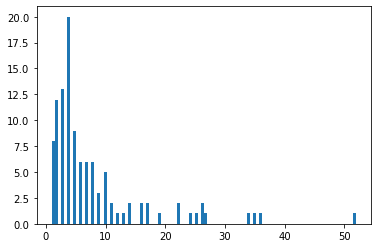

In [36]:
# Degree Distribution 시각화1
import matplotlib.pyplot as plt
degree = nx.degree(G)
%matplotlib inline
plt.figure()
h = plt.hist(dict(degree).values(), 100)
plt.show() # 위에서 degree = nx.degree(G)로 설정하였음

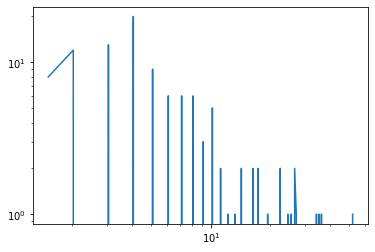

In [37]:
y = h[0] #각 degree구간에 해당하는 수의 degree를 몇 개의 노드가 가지고 있는지...
x = h[1][1:] #h[1]은 bins의 edge값들이 들어있는데, 오른쪽 edge값을 기준으로 삼기 위해 맨 왼쪽 값을 제외해줍니다.
plt.loglog(x, y)

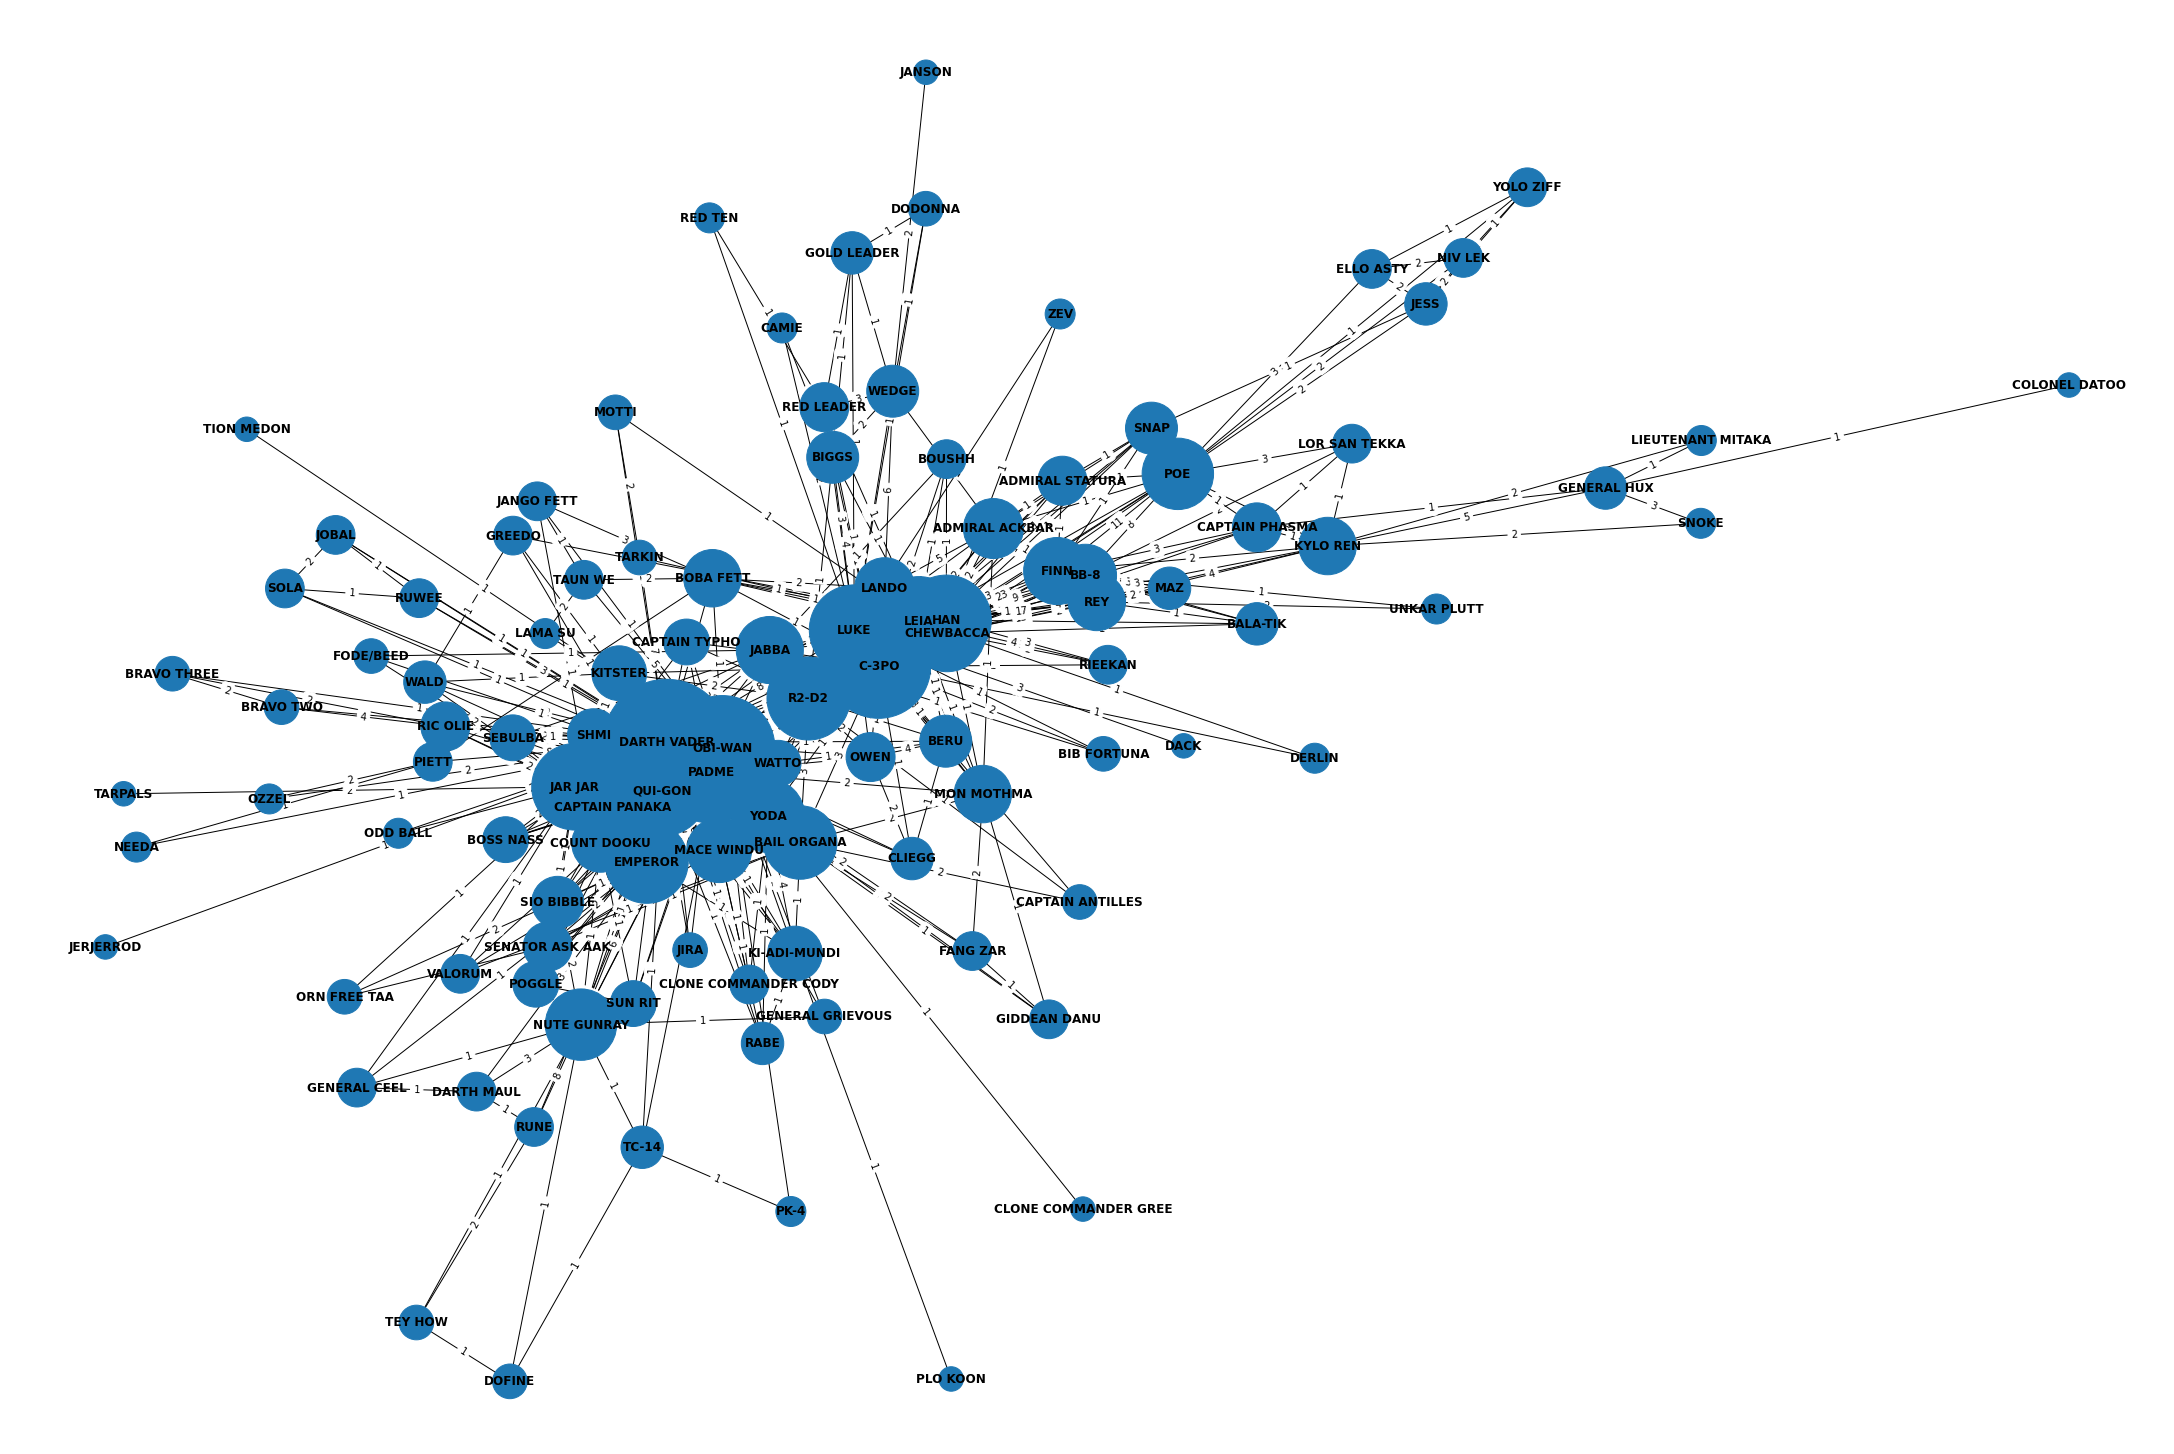

In [38]:
# visualize weighted graph
from matplotlib import pyplot as plt
plt.figure(figsize=(30,20))
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=[300 + v[1]*300 for v in degree], font_weight= 'bold')
edge_weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos,  edge_labels = edge_weight)
plt.show()

In [39]:
deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)
clo_cen = nx.closeness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)

In [40]:
# 각각에 대한 Top 3
print('degree centrality')
print(sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('--------------------')
print('betweenness centrality')
print(sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('--------------------')
print('closeness centrality')
print(sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('--------------------')
print('eigenvector centrality')
print(sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:3])

degree centrality
[('DARTH VADER', 0.47706422018348627), ('OBI-WAN', 0.3302752293577982), ('C-3PO', 0.3211009174311927)]
--------------------
betweenness centrality
[('DARTH VADER', 0.2895347920651335), ('OBI-WAN', 0.16566867063854884), ('C-3PO', 0.14164337519692108)]
--------------------
closeness centrality
[('DARTH VADER', 0.6123595505617978), ('C-3PO', 0.5647668393782384), ('OBI-WAN', 0.5618556701030928)]
--------------------
eigenvector centrality
[('DARTH VADER', 0.33706152660446603), ('OBI-WAN', 0.2712079460236519), ('C-3PO', 0.2670150777367724)]
